Main Doubt- How to use Prompts (To avoid Hallucination) along with query

## **Question Answering Over Single Document**

Question Answering refers to the process of extracting relevant information from a given set of documents in order to provide accurate and concise answers to user queries.

# Question Answering Over Document Mainly has Two Steps :

1.   **Ingestion** of documents into a queriable format
2.   **Generation** augmented generation chain.



**1.Ingestion**

In order use a language model to interact with data, first data needs to be in suitable format , That format would be an " **Index.** "

There are several types of indexes, but by far the most common one is a **Vectorstore.**
Ingesting documents into a vectorstore can be done with the following steps:


    1.1   Load documents (using a Document Loader)
           -A Document Loader retrieves and prepares documents for processing by retrieving the document from a source and parsing its content for further analysis.

    1.2   Split documents (using a Text Splitter)
           -A Text Splitter divides a document into smaller segments, such as paragraphs ,sentences or chunks to facilitate processing of the text. It helps in organizing the document's content and enables more targeted operations on individual portions of the text.

    1.3   Create embeddings for documents (using a Text Embedding Model)
           -A Text Embedding Model transforms documents into numerical representations, known as embeddings, which capture the semantic meaning and contextual information of the text. These embeddings enable various downstream NLP tasks by providing a dense and meaningful representation of the documents.

    1.4   Store documents and embeddings in a vectorstore
           -A Vectorstore is a storage mechanism that stores both documents and their corresponding embeddings as vectors, allowing efficient retrieval and similarity calculations between documents based on their embeddings. It provides a convenient way to index and search documents based on their semantic similarities.

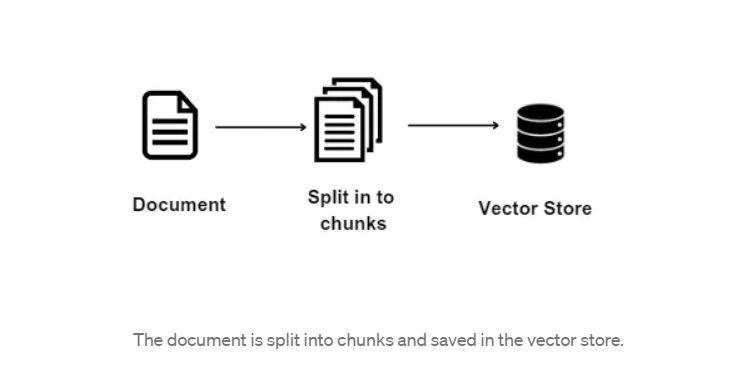







**2.Generation**

      2.1   Receive user question
            -The system receives a user's question as input, It serves as the input for the question-answering process, where the system aims to provide a relevant and accurate response based on the available knowledge and resources.

      2.2   Lookup documents in the index relevant to the question
            -The system looks up documents in the index that are most relevant to the user's question, using techniques such as keyword matching, semantic similarity, or other retrieval methods. This step helps narrow down the search space and focuses on the documents that are likely to contain the information needed to answer the question.

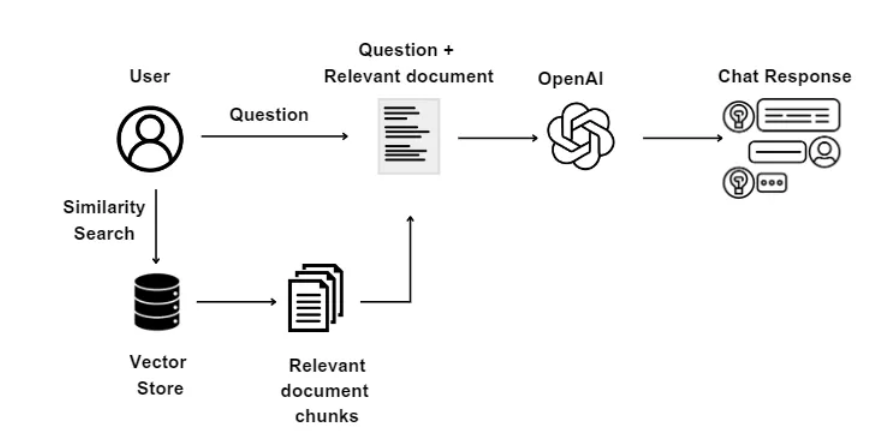

Installing Necessary Libraries using Following Commands

In [ ]:
!pip install langchain
!pip install cohere
!pip install chromadb
!pip install pypdf
!pip install datasets
!pip install SpeechRecognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Langchain Documentation- https://python.langchain.com/docs/use_cases/question_answering/

Cohere- https://cohere.com/

ChromaDB- https://www.trychroma.com/

Pypdf- https://pypdf2.readthedocs.io/en/3.0.0/


Import the necessary libraries

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import TextLoader, DirectoryLoader
from langchain.document_loaders import DirectoryLoader
from langchain.embeddings import CohereEmbeddings
from langchain.vectorstores import Chroma
from langchain.document_loaders import PyPDFLoader
import os
from langchain.llms import Cohere
from langchain.evaluation.loading import load_dataset
from langchain.indexes import VectorstoreIndexCreator
from langchain.chains import RetrievalQA
import speech_recognition as sr
from langchain.evaluation.qa import QAEvalChain

Single File
1. PDF
2. Text File
3. Audio File

Audio Files

In [ ]:
def audio_to_text(audio_file):
    # Create a recognizer object
    recognizer = sr.Recognizer()

    # Load the audio file
    with sr.AudioFile(audio_file) as source:
        # Read the audio data from the file
        audio_data = recognizer.record(source)

        # Perform speech recognition
        text = recognizer.recognize_google(audio_data)

    # Return the recognized text
    return text

In [ ]:
file_path = "/content/state_of_the_union.txt"

if os.path.isfile(file_path):
    file_extension = os.path.splitext(file_path)[1].lower()
    if file_extension == ".pdf":
      loader = PyPDFLoader(file_path) #Step 1.1
    if file_extension == ".txt":
       loader = TextLoader(file_path) #Step 1.1
    if file_extension == ".wav":
      result = audio_to_text(file_path)
      # Specify the path for the output text file
      output_file_path = "audiofile.txt"
      # Write the result to a text file
      with open(output_file_path, 'w') as file:
          file.write(result)
      loader = TextLoader("/content/audiofile.txt")

else:
    print("Only PDF, Text and Audio Files (WAV) are allowed")


In [ ]:
print(loader)

In [ ]:
import getpass

password = getpass.getpass("Enter your API Key: ")

### **Hyperparameters:**

i] chunk_size:  This parameter determines the maximum size of each document chunk in terms of characters. When the text is split into chunks, each chunk will have a size that is approximately equal to or smaller than the specified chunk_size. If a document exceeds the chunk_size, it will be split into multiple chunks.

Ex- The chunk size refers to the maximum length or size of each individual chunk of text. It determines how many tokens (words or characters) are included in each chunk. For example, if the chunk size is set to 512 tokens, the input text will be divided into chunks of approximately 512 tokens each.



---


ii] chunk_overlap: This parameter specifies the number of characters that overlap between consecutive chunks. When a document is split into chunks, the chunks will have an overlap of chunk_overlap characters. This overlap ensures that important context is preserved across adjacent chunks.

Ex-For example, if the chunk size is set to 512 tokens and the chunk overlap is set to 128 tokens, the adjacent chunks will share 128 tokens. In practice, this means that when splitting the text, the first chunk will start at the beginning of the document and end at token 512, the second chunk will start at token 385 (512 - 128) and end at token 897 (512 + 385), and so on.



---
**Selection Criteria**

Both the chunk size and chunk overlap parameters can impact the performance and output of the language model. Larger chunk sizes can improve efficiency by reducing the number of separate requests for long texts, but they may also increase the likelihood of truncation and loss of context. On the other hand, smaller chunk sizes with higher overlap provide more context but may require more computational resources.


It's important to experiment with different values of chunk size and overlap to find an optimal balance that suits the specific use case and requirements of your application.

In [ ]:
documents = loader.load()

#1.2
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0) #Splitting the text and creating chunks
docs = text_splitter.split_documents(documents)
#1.3
embeddings = CohereEmbeddings(cohere_api_key=password) #Creating Cohere Embeddings

In [ ]:
#1.4
db = Chroma.from_documents(docs, embeddings) #Storing the embeddings in the vector database

Query From Text File

In [ ]:
#2.1
query = "What did the president say about Ketanji Brown Jackson"
#2.2
docs = db.similarity_search(query) #Searching for the query in the Vector Database and using cosine similarity for the same.
#Cosine Similarity- https://www.machinelearningplus.com/nlp/cosine-similarity/

In [ ]:
print(docs[0].page_content)

Query From PDF File

In [ ]:
query = "What was the Russian Ukraine War previsouly reffered as?"
docs = db.similarity_search(query)

In [ ]:
print(docs[0].page_content)

Query from Audio File

In [ ]:
query = "What is today?"
docs = db.similarity_search(query)

In [ ]:
print(docs[0].page_content)

In [ ]:
retriever = db.as_retriever(search_type="mmr")

In [ ]:
retriever.get_relevant_documents(query)[0]
#Tells us the document, thus avoiding hallucination

From URL

In [ ]:
pip install unstructured

In [ ]:
from langchain.document_loaders import UnstructuredURLLoader

In [ ]:
urls = [
    "https://www.understandingwar.org/backgrounder/russian-offensive-campaign-assessment-february-8-2023",
    "https://www.understandingwar.org/backgrounder/russian-offensive-campaign-assessment-february-9-2023",
]

In [ ]:
loader = UnstructuredURLLoader(urls=urls)

In [ ]:
documents = loader.load()

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0) #Splitting the text and creating chunks
docs = text_splitter.split_documents(documents)

embeddings = CohereEmbeddings(cohere_api_key=password) #Creating Cohere Embeddings

In [ ]:
db = Chroma.from_documents(docs, embeddings)

In [ ]:
query = "What were the two locations near Kreminna that were reportedly attacked by Russian forces?"
docs = db.similarity_search(query)

In [ ]:
print(docs[0].page_content)

Other ways to reduce Hallucinations

1- Prompt Engineering Methods

a) Request for Evidence

b) Set Boundarie: Ask the model to answer from the text only and if thats not possible tell it to return a paticular answer

c) Ask the model to describe the question in detail before answering

d) Step by Step Reasoning


Evaluation

The main problem in evaluation is
1. Lack of Data-You generally don't have a ton of data to evaluate your chains/agents over before starting a project.
2. Lack of Metrics- valuating generated text is much more complicated than evaluating a classification prediction, or a numeric prediction.

Solutions
1.  Solving Data: LangChainDatasets a Community space on Hugging Face. It intends to be a collection of open source datasets for evaluating common chains and agents.

2. Dont use any metrics and rely on looking results by eyes.

3. Use Langchain models.

**Evaluation**

Steps :


1.   Loading dataset / files

2.   Setting Up chain

     Create some pipelines for doing question answering.

          1.creating an index over the data in question.
          2.create a question answering chain.
1.   Make Prediction

     First, we can make predictions one datapoint at a time. Doing it at this level of granularity allows use to explore the outputs in detail, and also is a lot cheaper than running over multiple datapoints

2.   Make Many Predictions

1.   Evaluate Performance

      Now we can evaluate the predictions.

          1.The first thing we can do is look at them by eye.
          2.Next, we can use a language model to score them programatically

      To get Matrix

          We can add in the graded output to the predictions dict and then get a count of the grades.

      Example:-
          Counter({' CORRECT': 7, ' INCORRECT': 4})








https://python.langchain.com/docs/guides/evaluation/qa_benchmarking_sota.html

In [ ]:
# Loading the Dataset

dataset = load_dataset("question-answering-state-of-the-union")

In [ ]:
loader = TextLoader(file_path)

In [ ]:
vectorstore = VectorstoreIndexCreator(embedding=CohereEmbeddings(cohere_api_key="4aJ9yWbIrOzI2W5LZeLeIdin2AYMpkq18PffLuvi")).from_loaders([loader]).vectorstore

In [ ]:
chain = RetrievalQA.from_chain_type(
    llm=Cohere(cohere_api_key=password),
    chain_type="stuff",
    retriever=vectorstore.as_retriever(),
    input_key="question",
)

In [ ]:
# Make a Prediction
chain(dataset[0])

In [ ]:
# Making Many Predictions
predictions = chain.apply(dataset)

In [ ]:
# Evalution with human Sense
predictions[0]

In [ ]:
llm = Cohere(cohere_api_key=password)
eval_chain = QAEvalChain.from_llm(llm)
graded_outputs = eval_chain.evaluate(
    dataset, predictions, question_key="question", prediction_key="result"
)

In [ ]:
# Adding Graded Outputs to Prediction Dict
for i, prediction in enumerate(predictions):
    prediction["grade"] = graded_outputs[i]["text"]

In [ ]:
# Getting Evaluation Matrix
from collections import Counter

Counter([pred["grade"] for pred in predictions])

We can also filter the datapoints to the incorrect examples and look at them.

In [ ]:
incorrect = [pred for pred in predictions if pred["grade"] == " INCORRECT"]

In [ ]:
incorrect[0]

Incorporate user feedback into the Q- A System: Can be done using Prompting.

1. While asking a question, user should be able to give priority to certain types of documents.

2. While asking a question, user should be able to ask questions only from certain documents in the document store.

These questions have/can be a part of prompt.
These are not really relevant for Q-A as we use cosine similarty and work on embeddings.
There is no attribute to focus on a paticular document.

In [ ]:
#The user should be able to compare answer of query from the private ingested
#document store and the same query from a website url. (This is a Q- A System)
#LLMs dont have capablities for running Real Time
#Eg. https://chat.openai.com/share/fa0300df-db57-4ad2-a641-ccb33ff869c2